In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

# gpus = tf.config.experimental.list_physical_devices('GPU')
# # gpu가 있다면...
# if len(gpus) > 0 :
#     try :
#         for gpu in gpus :
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e :
#         print(e)

In [38]:
# 데이터를 읽어온다.
df1 = pd.read_csv('./data/picher_stats_2017.csv')
df1.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [39]:
# 선수 이름을 제거한다.
df1.drop('선수명', inplace=True, axis=1)
df1.head()

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [40]:
# 팀명을 숫자로 변환한다.
encoder1 = LabelEncoder()
df1['팀명'] = encoder1.fit_transform(df1['팀명'])
df1

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,4,16,7,0,0,0,30,30,190.0,8.95,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,2,11,11,1,0,0,30,29,185.1,7.43,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,0,20,6,0,0,0,31,31,193.1,7.36,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,2,10,7,0,0,0,28,28,175.2,8.04,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,6,13,7,0,0,0,30,30,187.1,7.49,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,8,2,5,0,0,2,33,5,62.2,4.31,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,0,3,2,0,0,0,25,11,59.1,4.85,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,6,0,2,0,0,0,9,2,14.2,4.91,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,7,0,3,0,1,0,41,0,43.2,7.63,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [41]:
# 입력과 결과로 나눈다.
X = df1.drop('연봉(2018)', axis=1)
y = df1['연봉(2018)']

In [42]:
# 표준화
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
display(X)

array([[-0.04225053,  3.32457765,  1.23120199, ..., -1.06162315,
         4.51802888,  2.74374569],
       [-0.7977895 ,  2.02618144,  2.51300132, ..., -1.07681252,
         4.10827019,  1.34172411],
       [-1.55332846,  4.36329461,  0.91075216, ..., -0.86922457,
         3.77439273,  5.34750005],
       ...,
       [ 0.71328843, -0.8302902 , -0.37104718, ...,  1.39399038,
        -0.9681847 , -0.02023971],
       [ 1.09105791, -0.8302902 , -0.05059734, ...,  0.71553221,
        -1.03647782, -0.54499636],
       [-1.17555898,  0.20842676,  0.26985249, ...,  1.15096059,
        -1.27170966, -0.54099058]])

In [43]:
# 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
# out_nodes = len(y.value_counts())
# loss_function = 'categorical_crossentropy'
# activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
if type(y) is pd.core.series.Series:
    out_nodes = 1
else : 
    out_nodes = y.shape[1]
    
loss_function = 'mean_squared_error'

In [44]:
# 입력노드의 개수
# 입력 데이터 행 하나의 컬럼의 개수
input_size = X.shape[1]
input_size

20

In [45]:
# 신경망 설계
model = Sequential()

model.add(Dense(30, input_dim=input_size))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(out_nodes))

In [46]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                630       
                                                                 
 activation (Activation)     (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 activation_1 (Activation)   (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,271
Trainable params: 1,271
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 학습모델을 저장할 경로
path = './model/23'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [48]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [49]:
# 조기 중단
call3 = EarlyStopping(monitor='val_loss', patience=50)

In [50]:
# 학습과 검증데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X_train, y_train, epochs=200000, batch_size=10000,
                    validation_data=[X_test, y_test], callbacks=[call1, call2, call3])

Epoch 1/200000
1/1 [==============================] - 1s 1s/step - loss: 1520769280.0000 - val_loss: 484708960.0000
Epoch 2/200000
1/1 [==============================] - 0s 72ms/step - loss: 1520765824.0000 - val_loss: 484707680.0000
Epoch 3/200000
1/1 [==============================] - 0s 61ms/step - loss: 1520762368.0000 - val_loss: 484706528.0000
Epoch 4/200000
1/1 [==============================] - 0s 70ms/step - loss: 1520759168.0000 - val_loss: 484705376.0000
Epoch 5/200000
1/1 [==============================] - 0s 70ms/step - loss: 1520756224.0000 - val_loss: 484704192.0000
Epoch 6/200000
1/1 [==============================] - 0s 66ms/step - loss: 1520753280.0000 - val_loss: 484703104.0000
Epoch 7/200000
1/1 [==============================] - 0s 61ms/step - loss: 1520750592.0000 - val_loss: 484702016.0000
Epoch 8/200000
1/1 [==============================] - 0s 65ms/step - loss: 1520747904.0000 - val_loss: 484700928.0000
Epoch 9/200000
1/1 [==============================] - 0s 7

In [52]:
# 리스트를 추출한다.
loss_list = history.history['loss']
val_loss_list = history.history['val_loss']

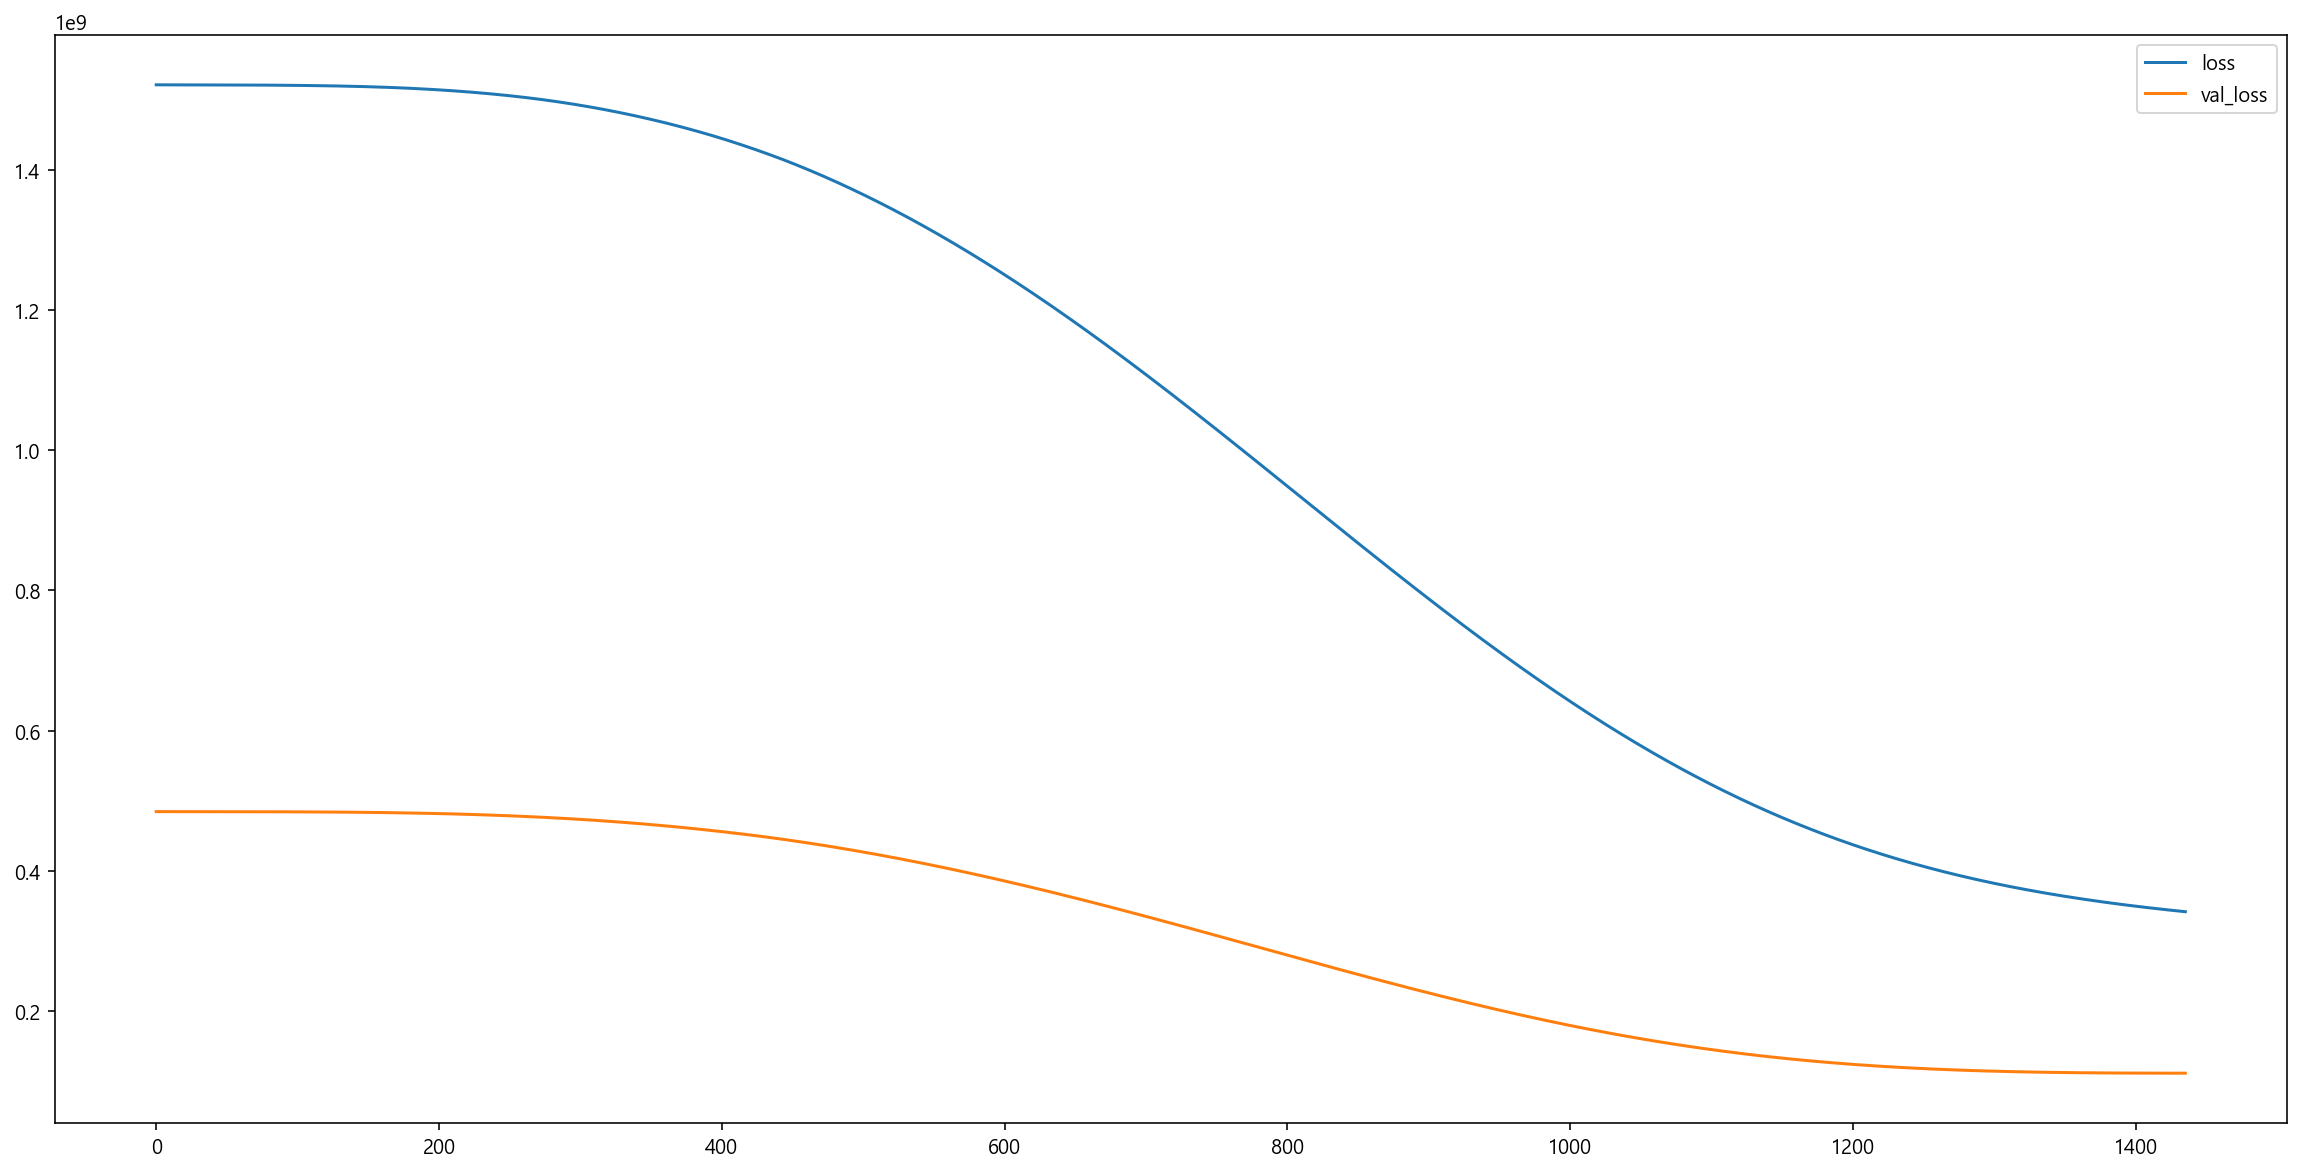

In [53]:
# 손실율 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list[:-50], label='loss')
plt.plot(val_loss_list[:-50], label = 'val_loss')
plt.legend()
plt.show()